In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)

data.set_index(['ID'],inplace=True)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
data.shape

(3999, 11)

In [7]:
data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

<Axes: ylabel='ID'>

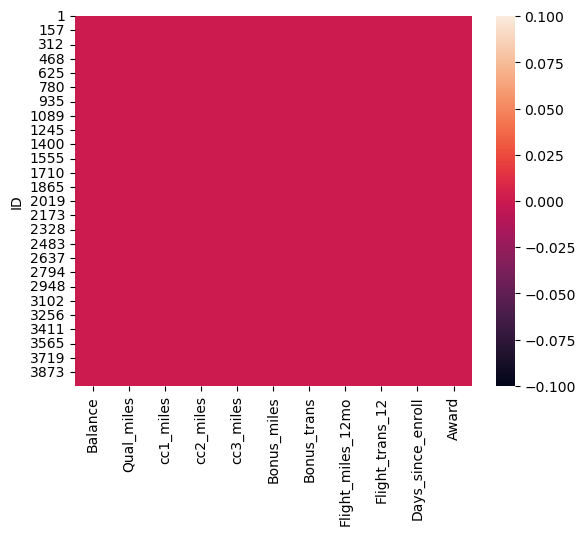

In [8]:
import seaborn as sns 
cols=data.columns
sns.heatmap(data[cols].isnull())

In [9]:
data[data.duplicated()].shape

(1, 11)

In [10]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [11]:
df=data.drop_duplicates()

In [12]:
df.shape

(3998, 11)

In [13]:
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [14]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [15]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


Text(0.5, 0, 'cc1_miles')

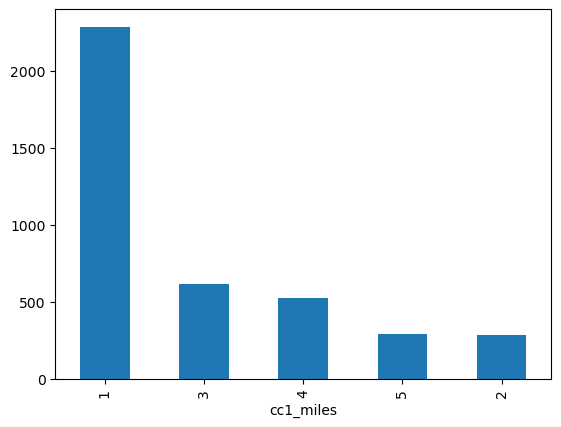

In [16]:
df['cc1_miles'].value_counts().plot.bar()
plt.xlabel('cc1_miles')

Text(0.5, 0, 'cc2_miles')

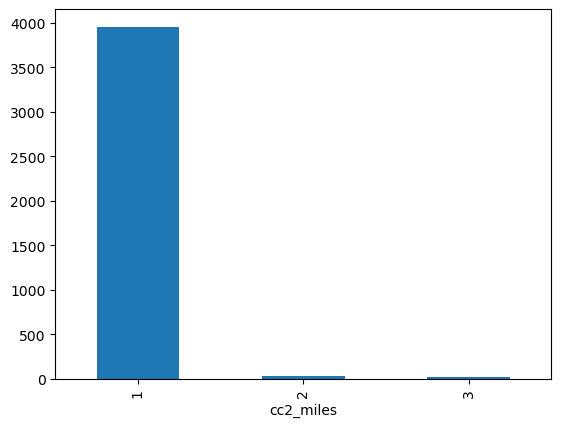

In [17]:
df['cc2_miles'].value_counts().plot.bar()
plt.xlabel('cc2_miles')

Text(0.5, 0, 'cc3_miles')

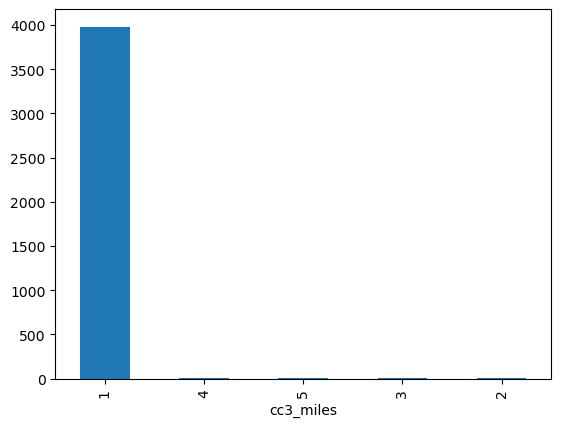

In [18]:
df['cc3_miles'].value_counts().plot.bar()
plt.xlabel('cc3_miles')

Text(0.5, 0, 'Award')

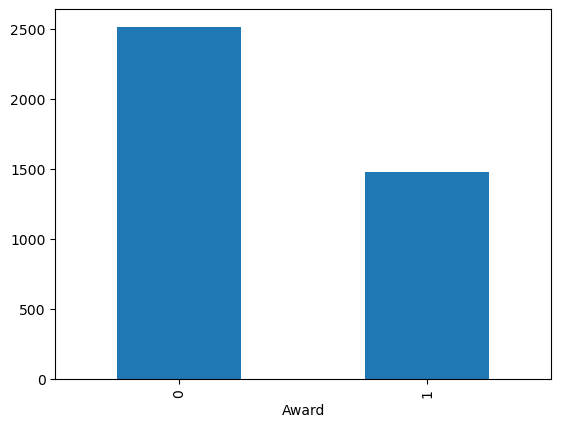

In [19]:
df['Award'].value_counts().plot.bar()
plt.xlabel('Award')

C:\Users\vishal\AppData\Local\Temp\ipykernel_14000\3483231404.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Balance)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Balance', ylabel='Density'>

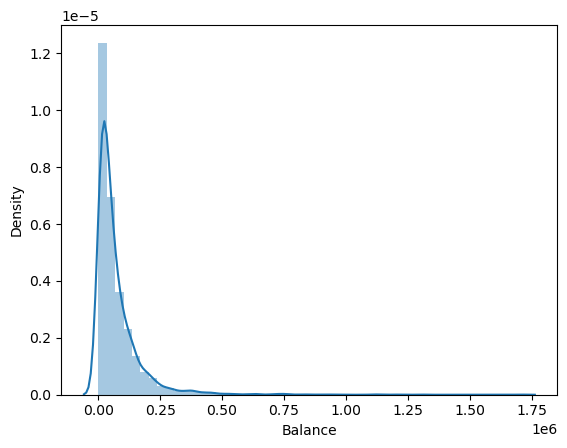

In [20]:
sns.distplot(df.Balance)

C:\Users\vishal\AppData\Local\Temp\ipykernel_14000\1063121120.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Qual_miles)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Qual_miles', ylabel='Density'>

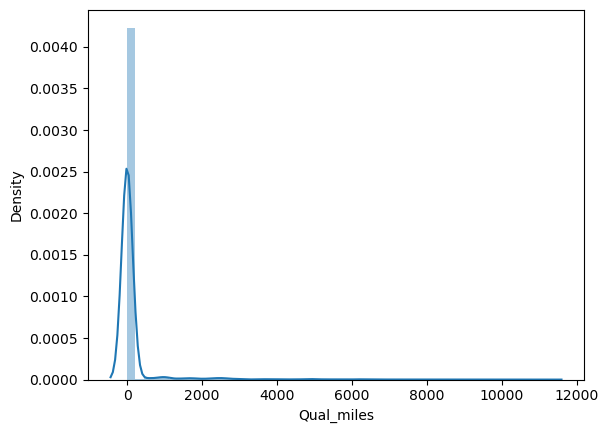

In [21]:
sns.distplot(df.Qual_miles)

C:\Users\vishal\AppData\Local\Temp\ipykernel_14000\4292760936.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Bonus_miles)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bonus_miles', ylabel='Density'>

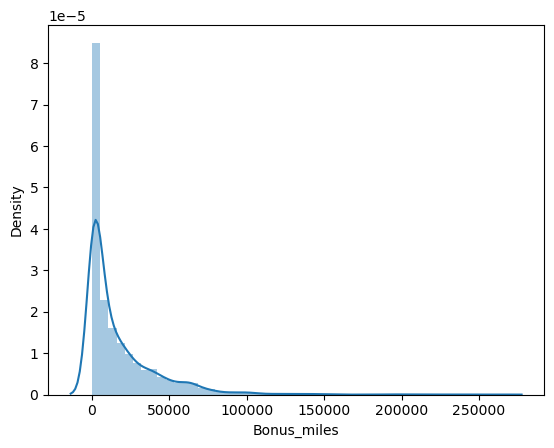

In [22]:
sns.distplot(df.Bonus_miles)

C:\Users\vishal\AppData\Local\Temp\ipykernel_14000\491574635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Bonus_trans)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bonus_trans', ylabel='Density'>

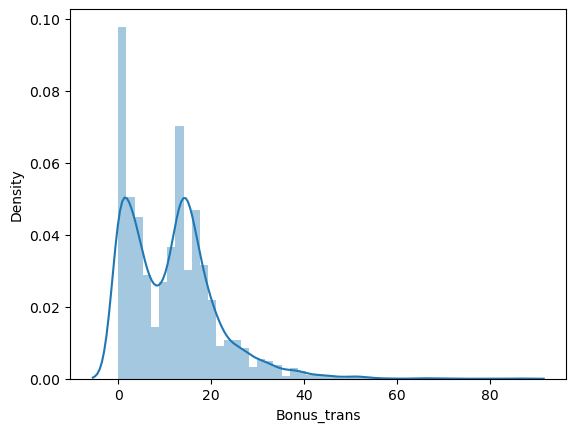

In [23]:
sns.distplot(df.Bonus_trans)

C:\Users\vishal\AppData\Local\Temp\ipykernel_14000\2925326414.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Flight_miles_12mo)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Flight_miles_12mo', ylabel='Density'>

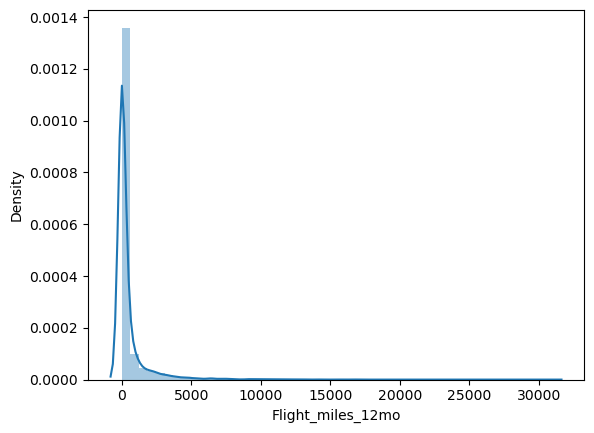

In [24]:
sns.distplot(df.Flight_miles_12mo)

C:\Users\vishal\AppData\Local\Temp\ipykernel_14000\2694356866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Flight_trans_12)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Flight_trans_12', ylabel='Density'>

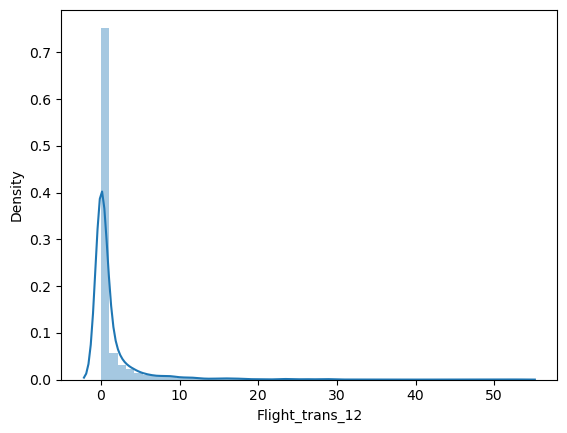

In [25]:
sns.distplot(df.Flight_trans_12)

C:\Users\vishal\AppData\Local\Temp\ipykernel_14000\1942956843.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Days_since_enroll)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Days_since_enroll', ylabel='Density'>

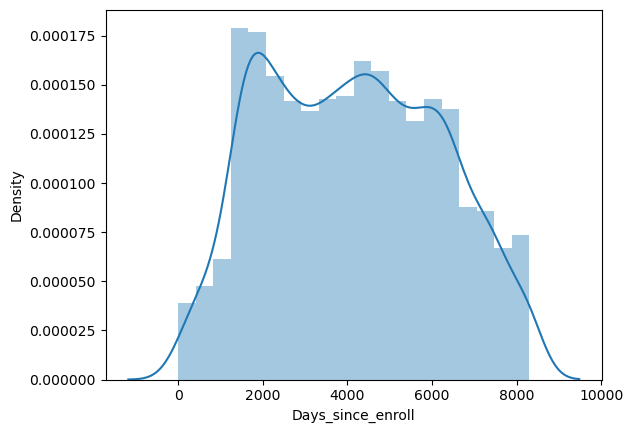

In [26]:
sns.distplot(df.Days_since_enroll)

C:\Users\vishal\AppData\Local\Temp\ipykernel_14000\2426618368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Award)
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Award', ylabel='Density'>

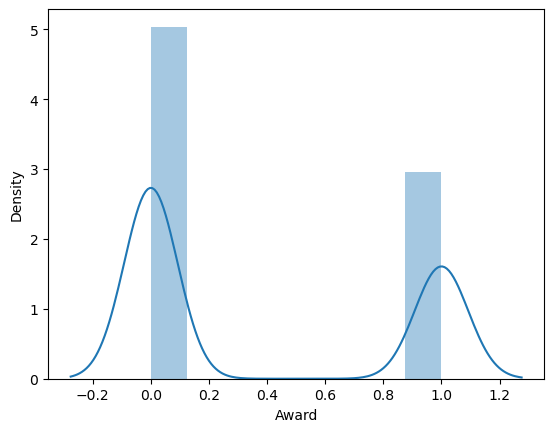

In [27]:
sns.distplot(df.Award)

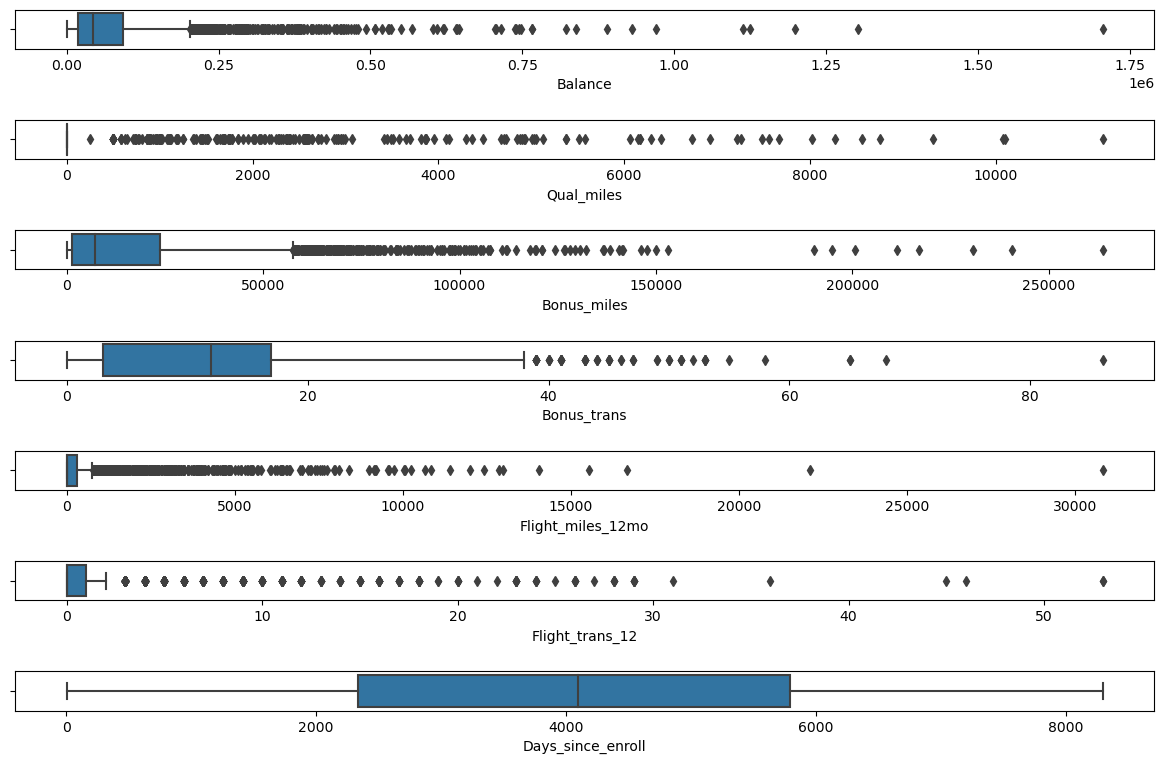

In [28]:
fig, axes=plt.subplots(7,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=df, ax= axes[0])
sns.boxplot(x='Qual_miles',data = df,ax =axes[1])
sns.boxplot(x='Bonus_miles',data = df, ax=axes [2])
sns.boxplot(x='Bonus_trans',data = df, ax= axes[3])
sns.boxplot(x='Flight_miles_12mo',data = df, ax= axes[4])
sns.boxplot(x='Flight_trans_12',data = df, ax= axes[5])
sns.boxplot(x='Days_since_enroll',data= df, ax = axes[6])
plt.tight_layout(pad=2.0)

C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

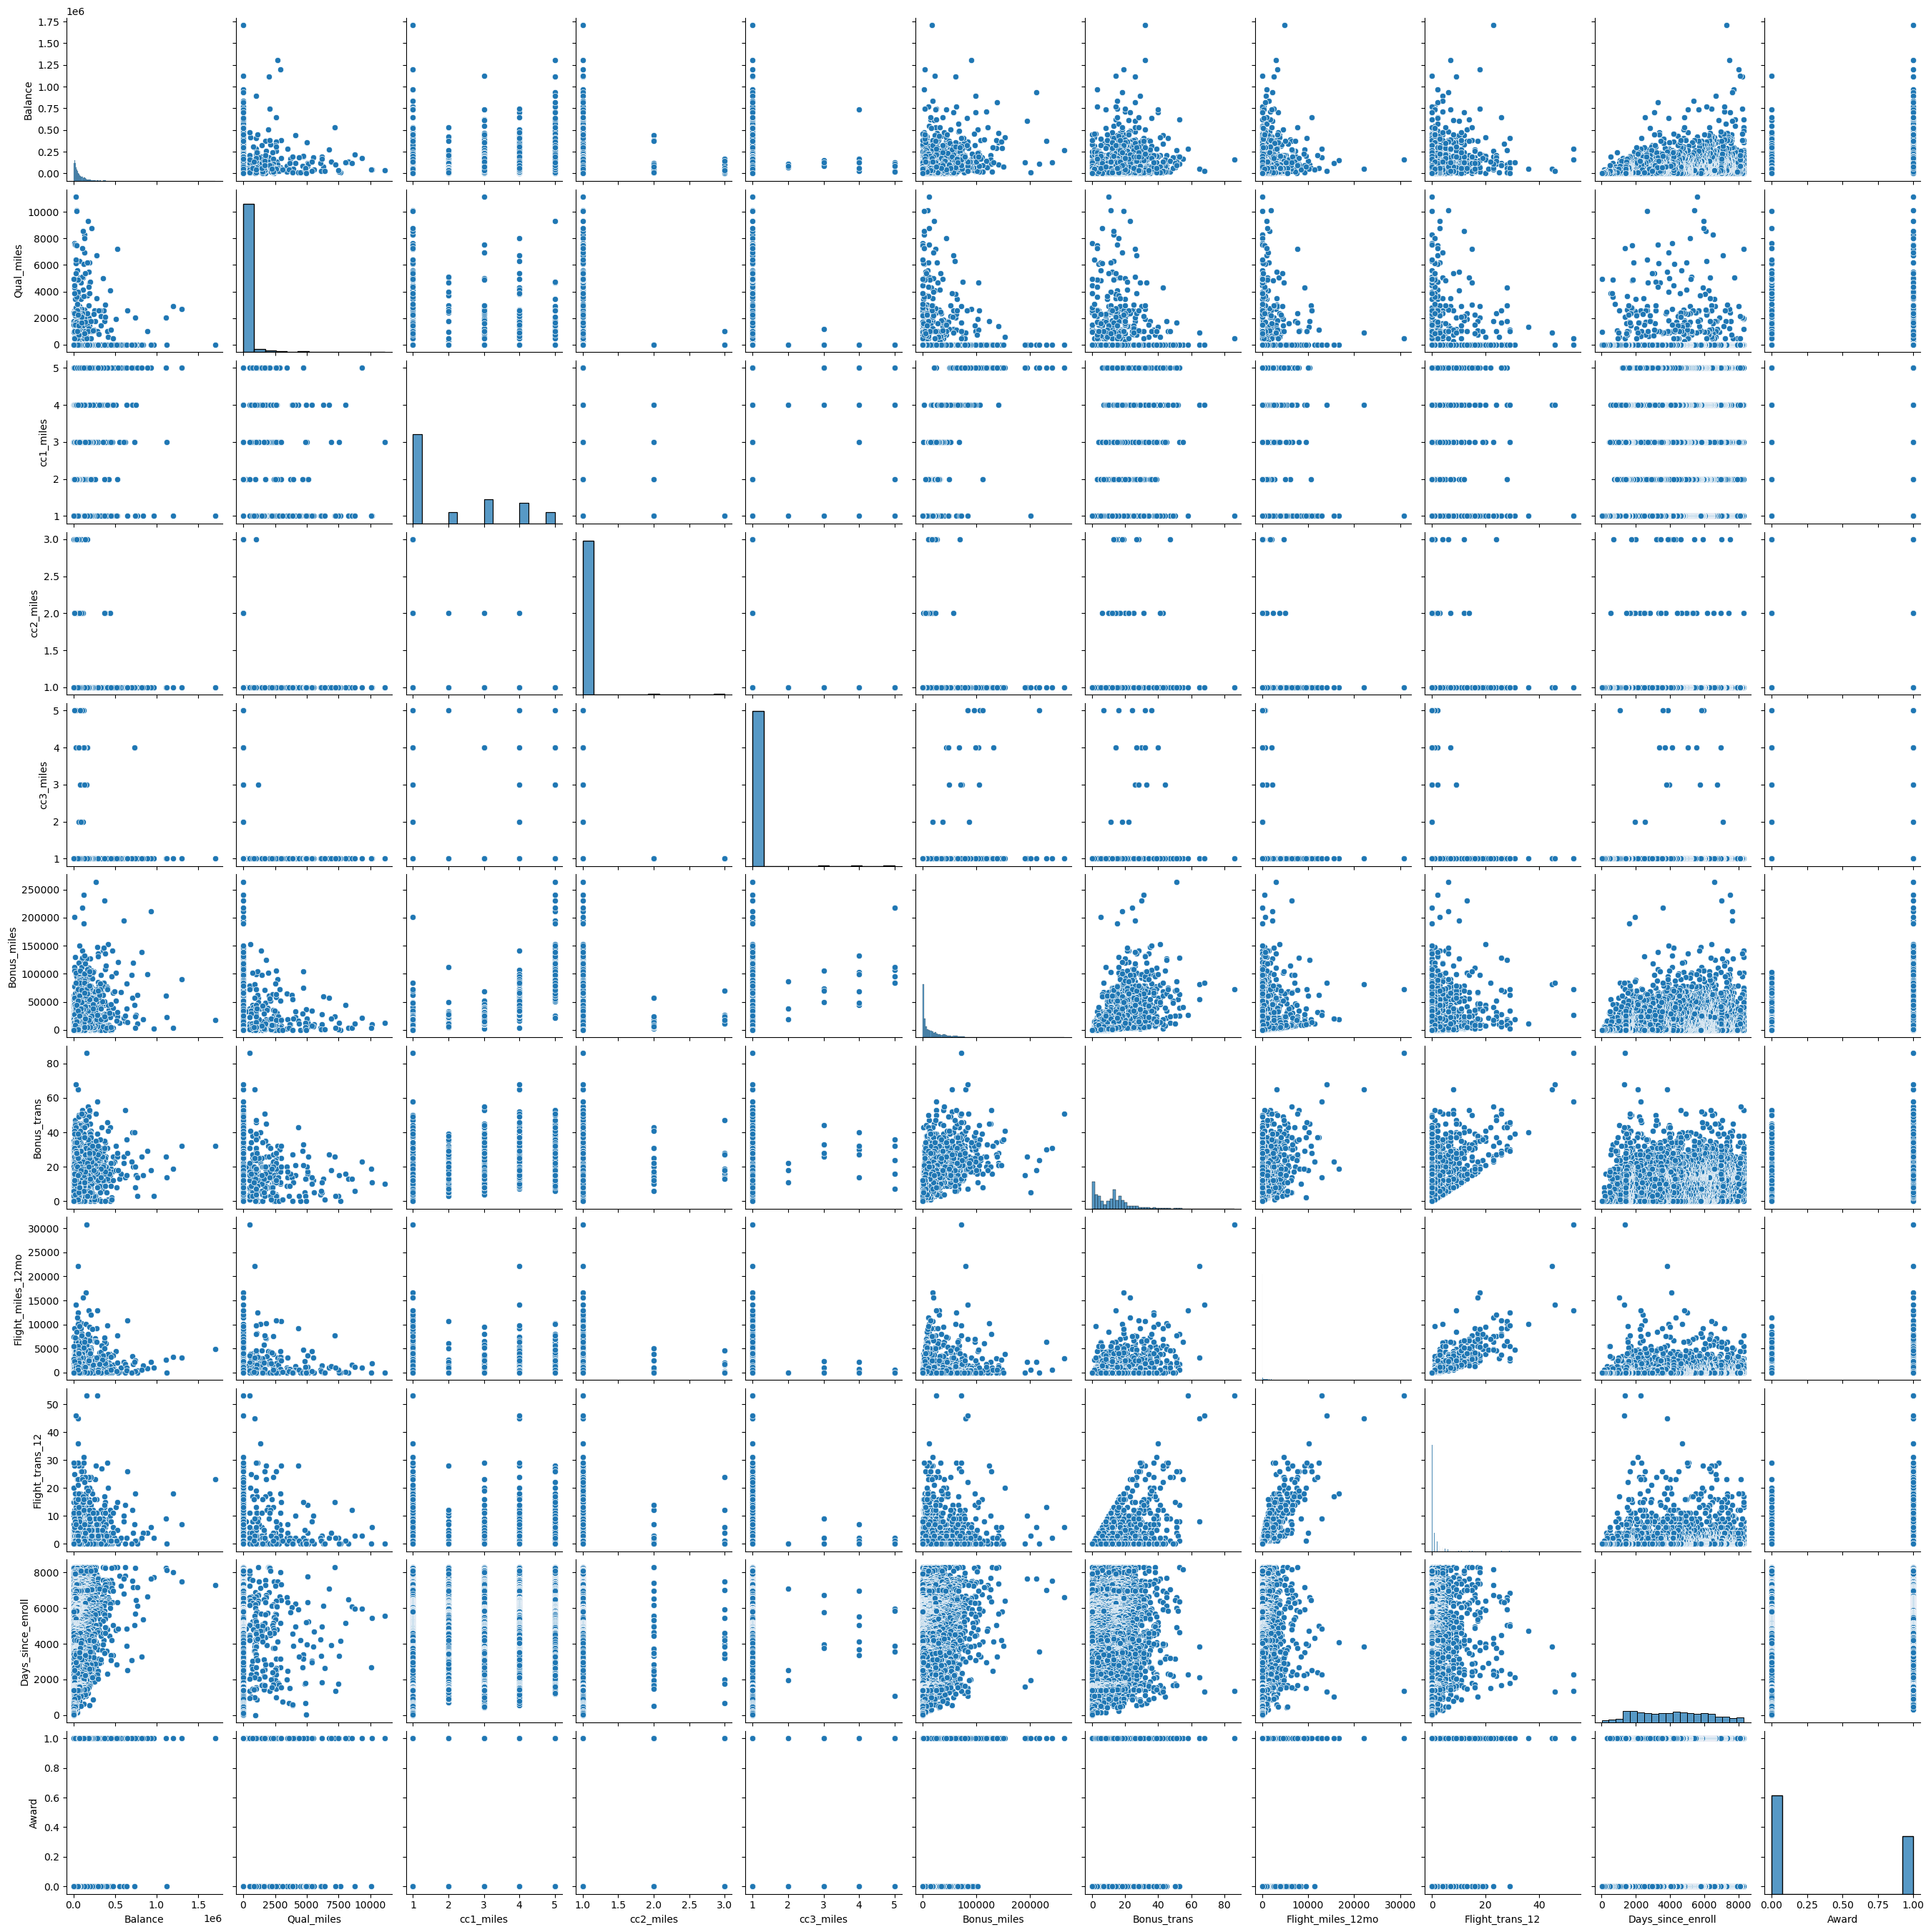

In [29]:
sns.pairplot(df)

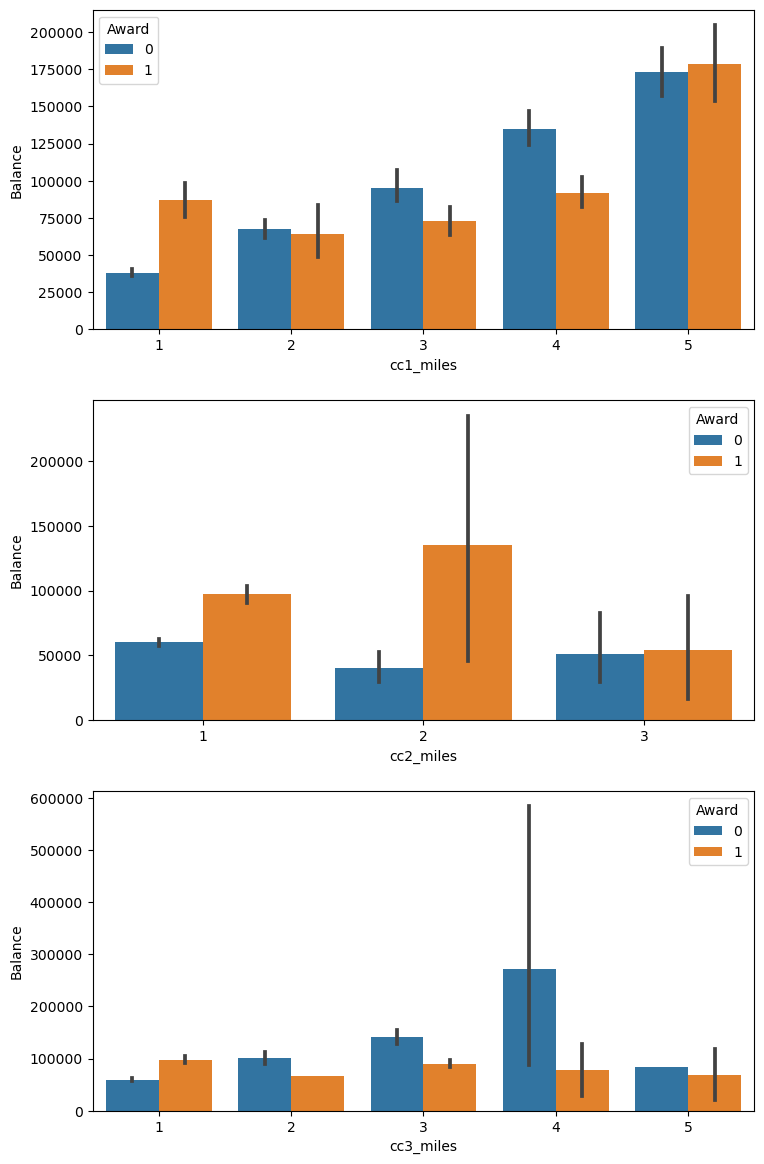

In [30]:
fig, axes=plt.subplots(3,1,figsize=(8,12),sharex=False,sharey=False)
sns.barplot(y= 'Balance',x= 'cc1_miles', hue='Award', data=df, ax=axes[0])
sns.barplot(y= 'Balance',x ='cc2_miles', hue='Award', data=df, ax=axes[1])
sns.barplot(y= 'Balance',x= 'cc3_miles', hue='Award', data=df, ax=axes[2])
plt.tight_layout(pad=2.0)

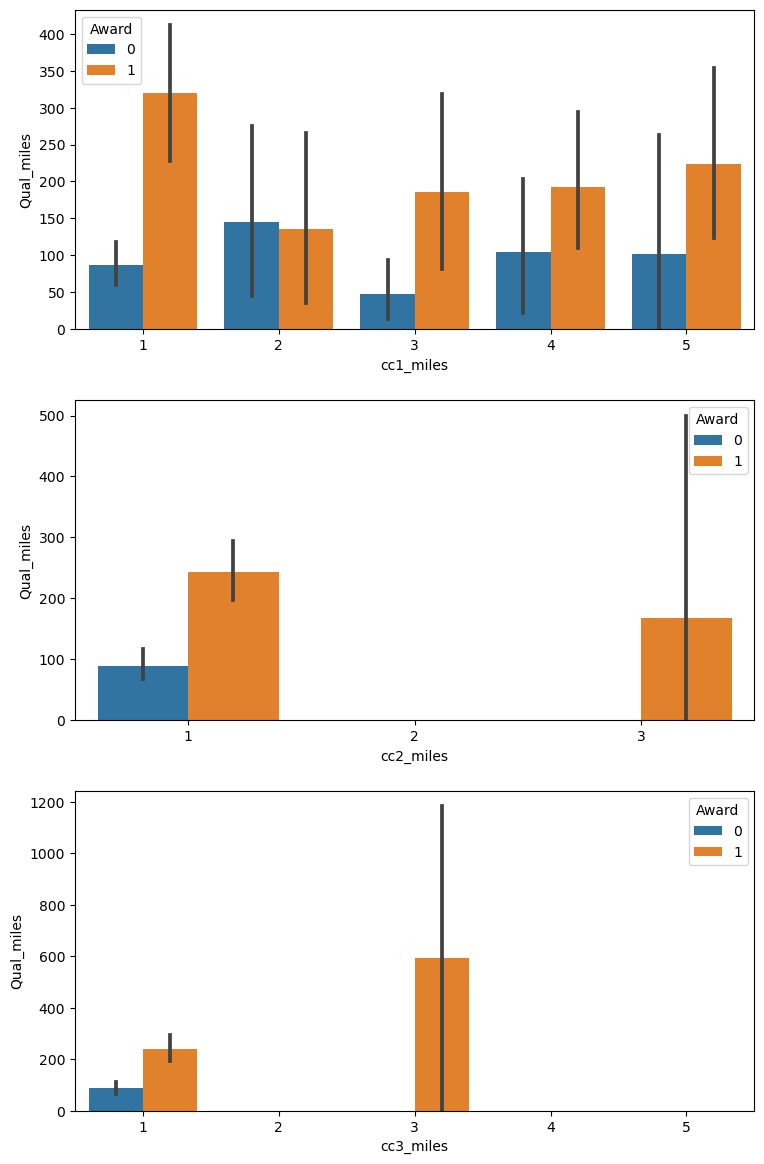

In [31]:
fig, axes=plt.subplots(3,1,figsize=(8,12),sharex=False,sharey=False)
sns.barplot(y='Qual_miles',x= 'cc1_miles', hue='Award', data=df, ax=axes[0])
sns.barplot(y='Qual_miles',x ='cc2_miles', hue='Award', data=df, ax=axes[1])
sns.barplot(y='Qual_miles',x= 'cc3_miles', hue='Award', data=df, ax=axes[2])
plt.tight_layout(pad=2.0)

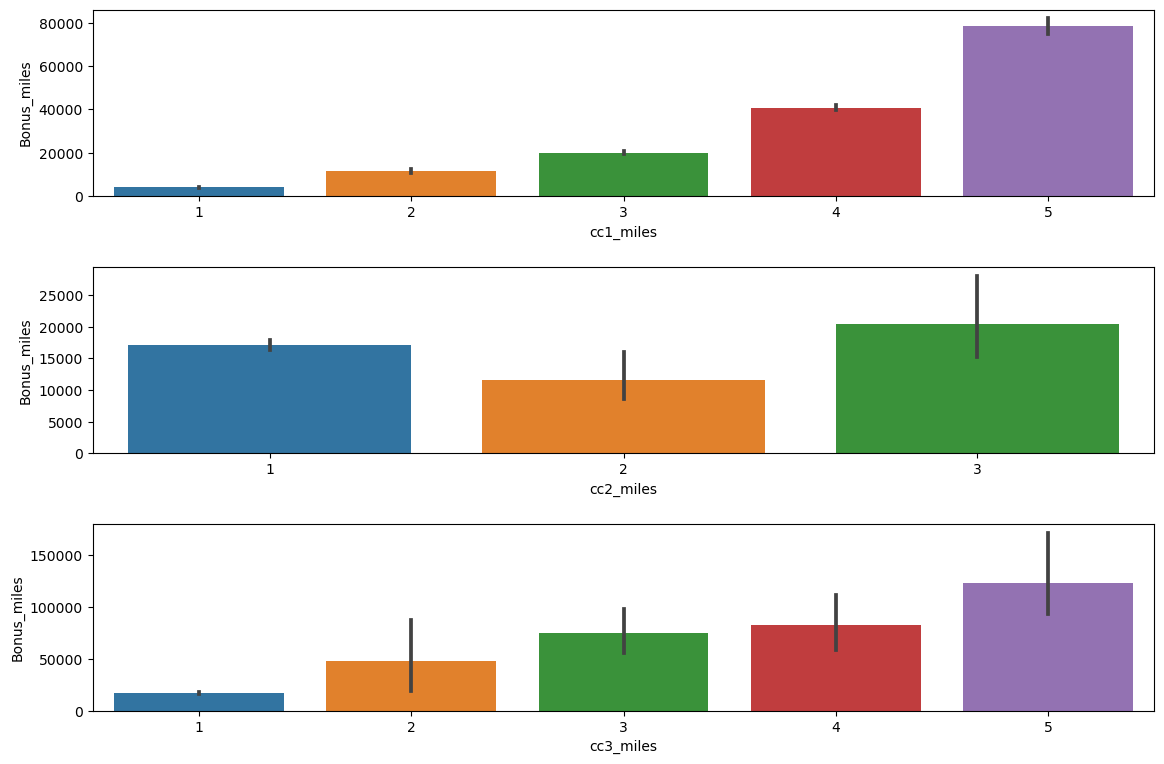

In [32]:
fig, axes=plt.subplots(3,1,figsize=(12,8),sharex=False,sharey=False)
sns.barplot(x='cc1_miles', y='Bonus_miles', data=df, ax=axes[0])
sns.barplot(x='cc2_miles', y='Bonus_miles', data=df, ax=axes[1])
sns.barplot(x='cc3_miles', y='Bonus_miles', data=df, ax=axes[2])
plt.tight_layout(pad=2.0)

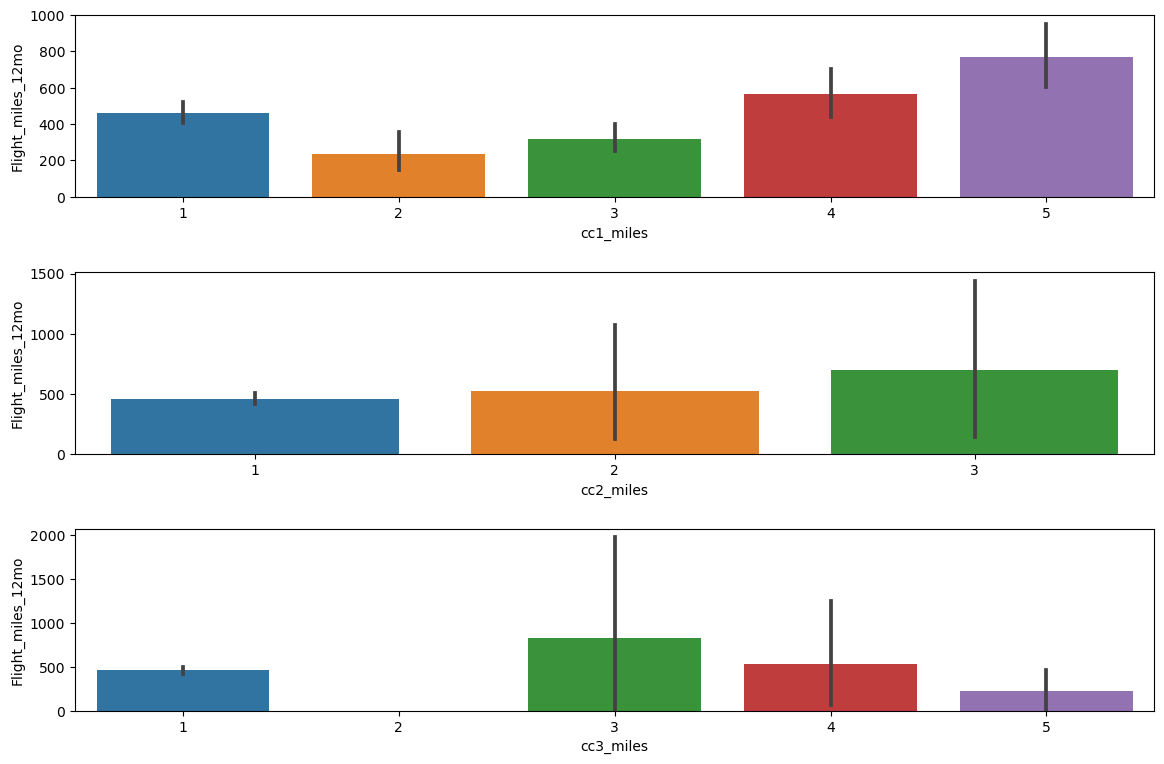

In [33]:
fig, axes=plt.subplots(3,1,figsize=(12,8),sharex=False,sharey=False)
sns.barplot(x='cc1_miles', y='Flight_miles_12mo',data =df, ax=axes[0])
sns.barplot(x='cc2_miles', y='Flight_miles_12mo', data =df, ax=axes[1])
sns.barplot(x='cc3_miles', y='Flight_miles_12mo', data =df, ax=axes[2])
plt.tight_layout(pad=2.0)

<Axes: xlabel='Award', ylabel='Bonus_trans'>

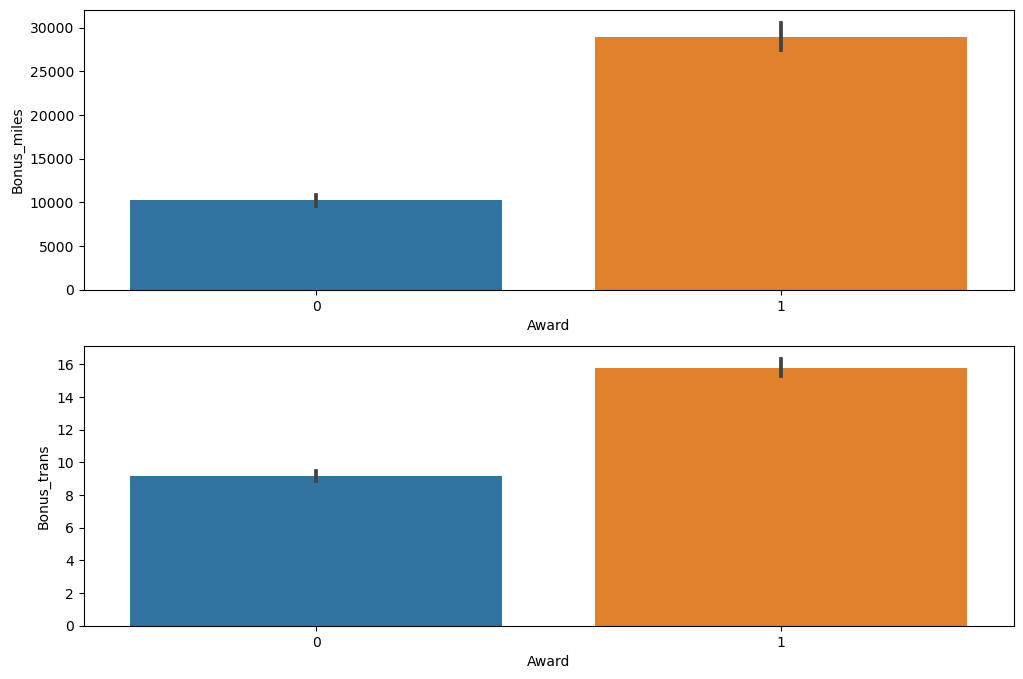

In [34]:
fig, axes=plt.subplots(2,1,figsize=(12,8),sharex=False,sharey=False)
sns.barplot(y='Bonus_miles', x='Award', data=df, ax=axes[0])
sns.barplot(y= 'Bonus_trans', x='Award', data=df, ax=axes[1])

<Axes: xlabel='Award', ylabel='Flight_trans_12'>

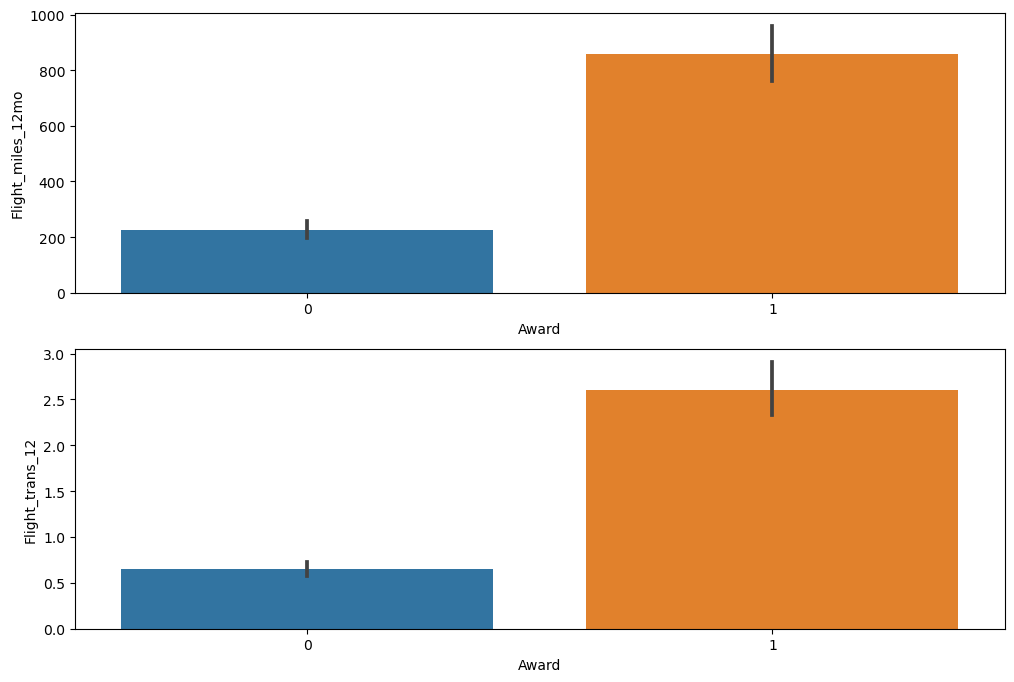

In [35]:
fig, axes=plt.subplots(2,1,figsize=(12,8),sharex=False,sharey=False)
sns.barplot(y='Flight_miles_12mo', x='Award', data=df, ax=axes[0])
sns.barplot(y= 'Flight_trans_12', x='Award', data=df, ax=axes[1])

In [36]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
standard_scaler= StandardScaler()
std_df =standard_scaler.fit_transform(df)
std_df.shape

(3998, 11)

In [37]:
minmax= MinMaxScaler()
minmax_df = minmax.fit_transform(df)
minmax_df.shape

(3998, 11)

# Heirarchical Clustering

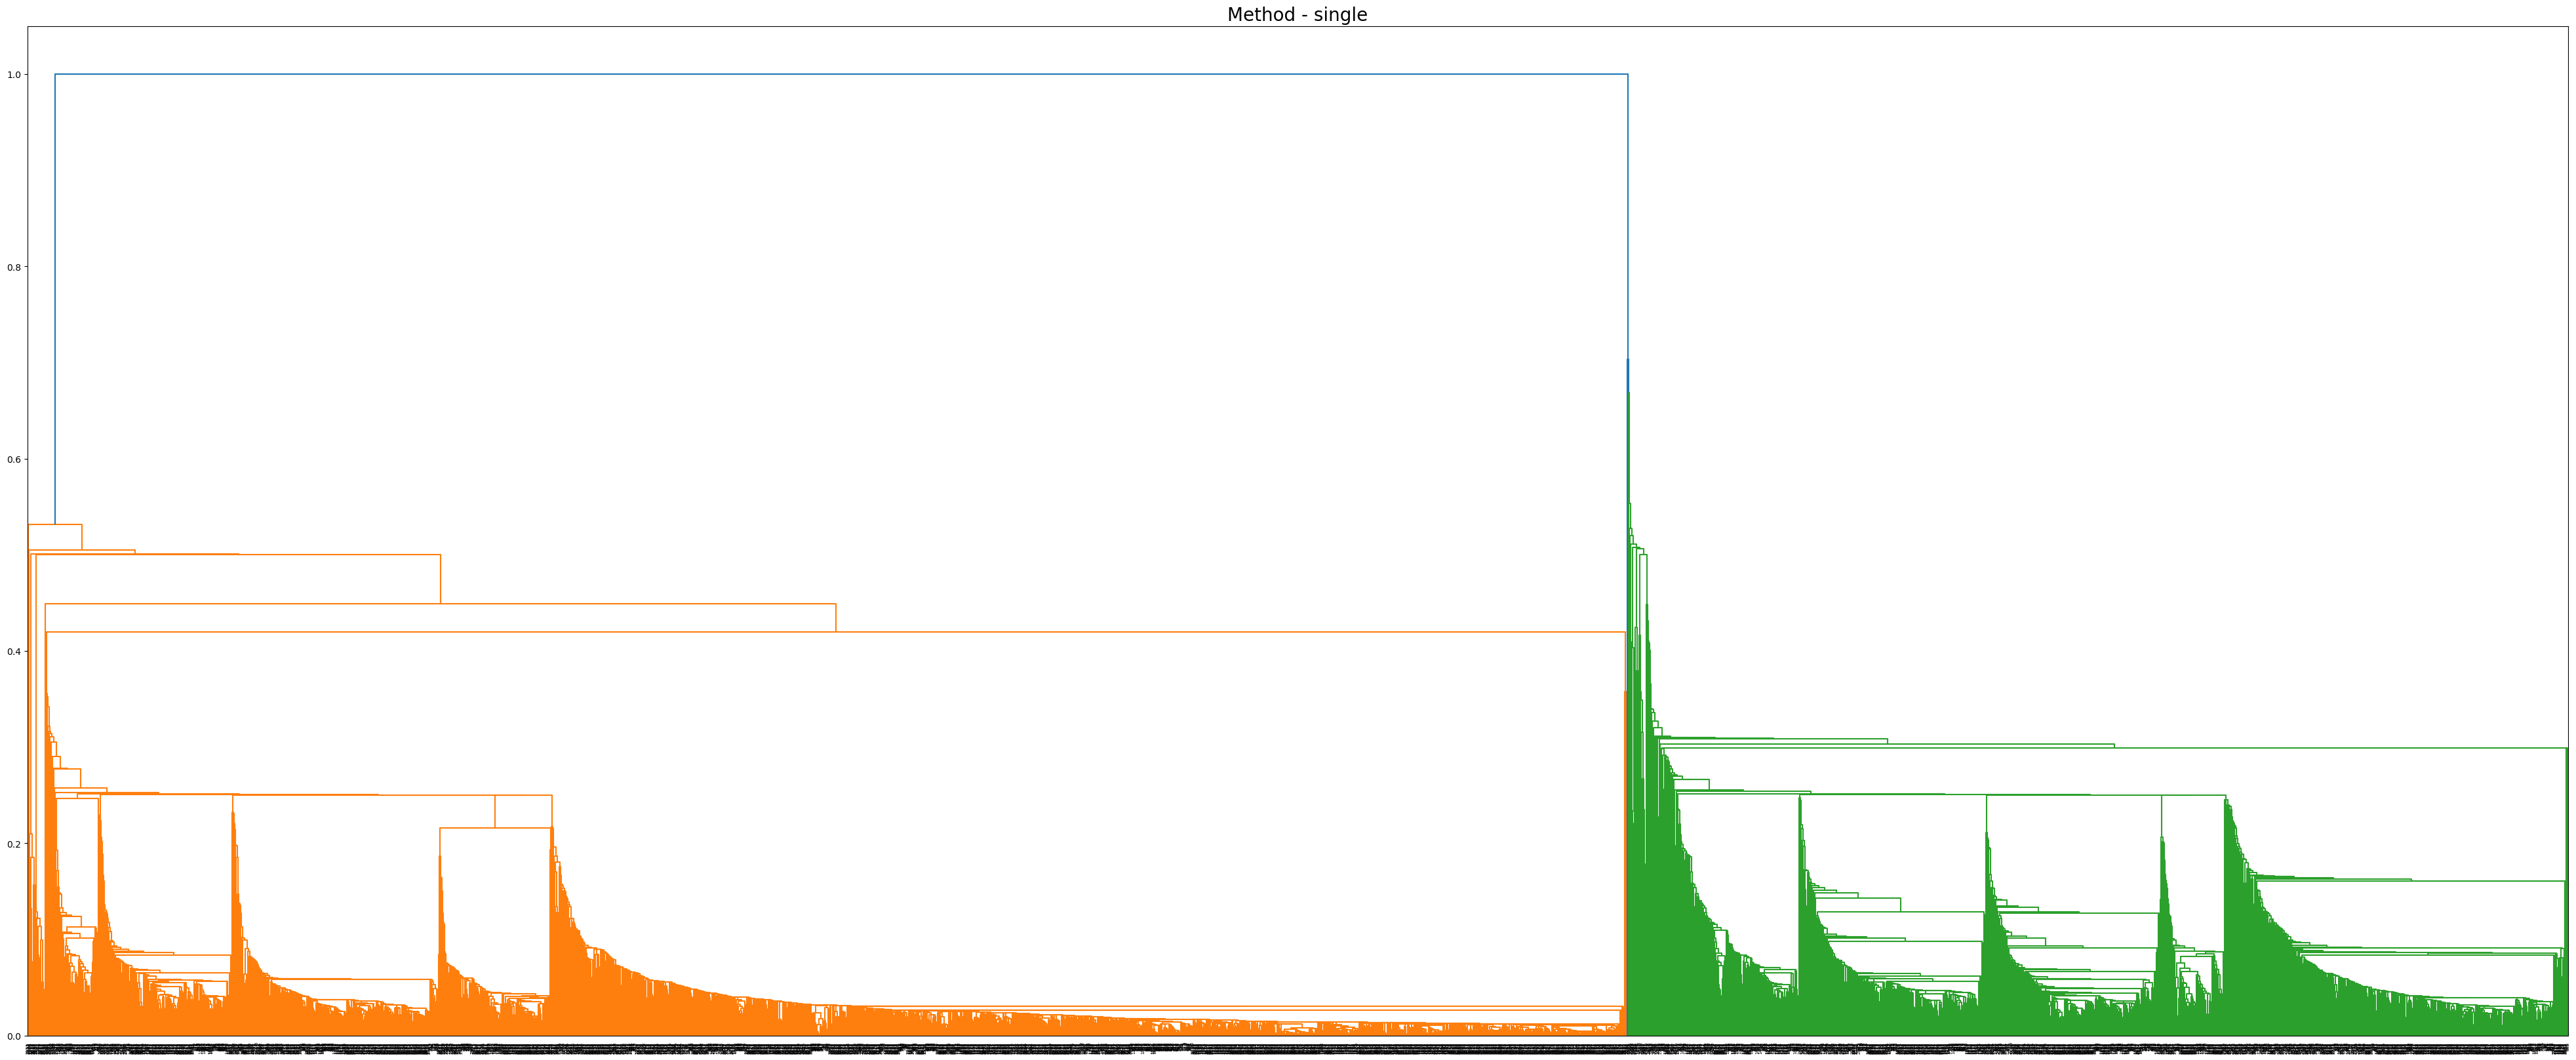

In [38]:
plt.figure(figsize=(50,20))
dendrogram= sch.dendrogram(sch.linkage(minmax_df,method= 'single'))
plt.title('Method - single',fontsize= 20)
plt.show()

In [39]:
hc_s = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage= 'single')

In [40]:
y_hc = hc_s.fit_predict(minmax_df)
y_hc

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [41]:
df['h_clusterid'] = y_hc
df

C:\Users\vishal\AppData\Local\Temp\ipykernel_14000\3584320747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['h_clusterid'] = y_hc


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [42]:
df.h_clusterid.value_counts()

h_clusterid
2    2515
0    1478
1       2
4       1
3       1
5       1
Name: count, dtype: int64

In [43]:
df.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97125.211773,240.345737,2.664411,1.015562,1.015562,28703.769959,15.742219,837.970230,2.566982,4628.257104,1.0
1,1,72811.000000,0.000000,1.000000,1.000000,4.500000,65932.500000,10.500000,0.000000,0.000000,2204.000000,0.0
2,2,59820.881909,87.706958,1.706163,1.013917,1.005964,10187.457654,9.145527,226.562227,0.653280,3822.821869,0.0
3,3,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1.0
4,4,15835.000000,0.000000,2.000000,1.000000,5.000000,112171.000000,16.000000,0.000000,0.000000,5825.000000,1.0
5,5,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0


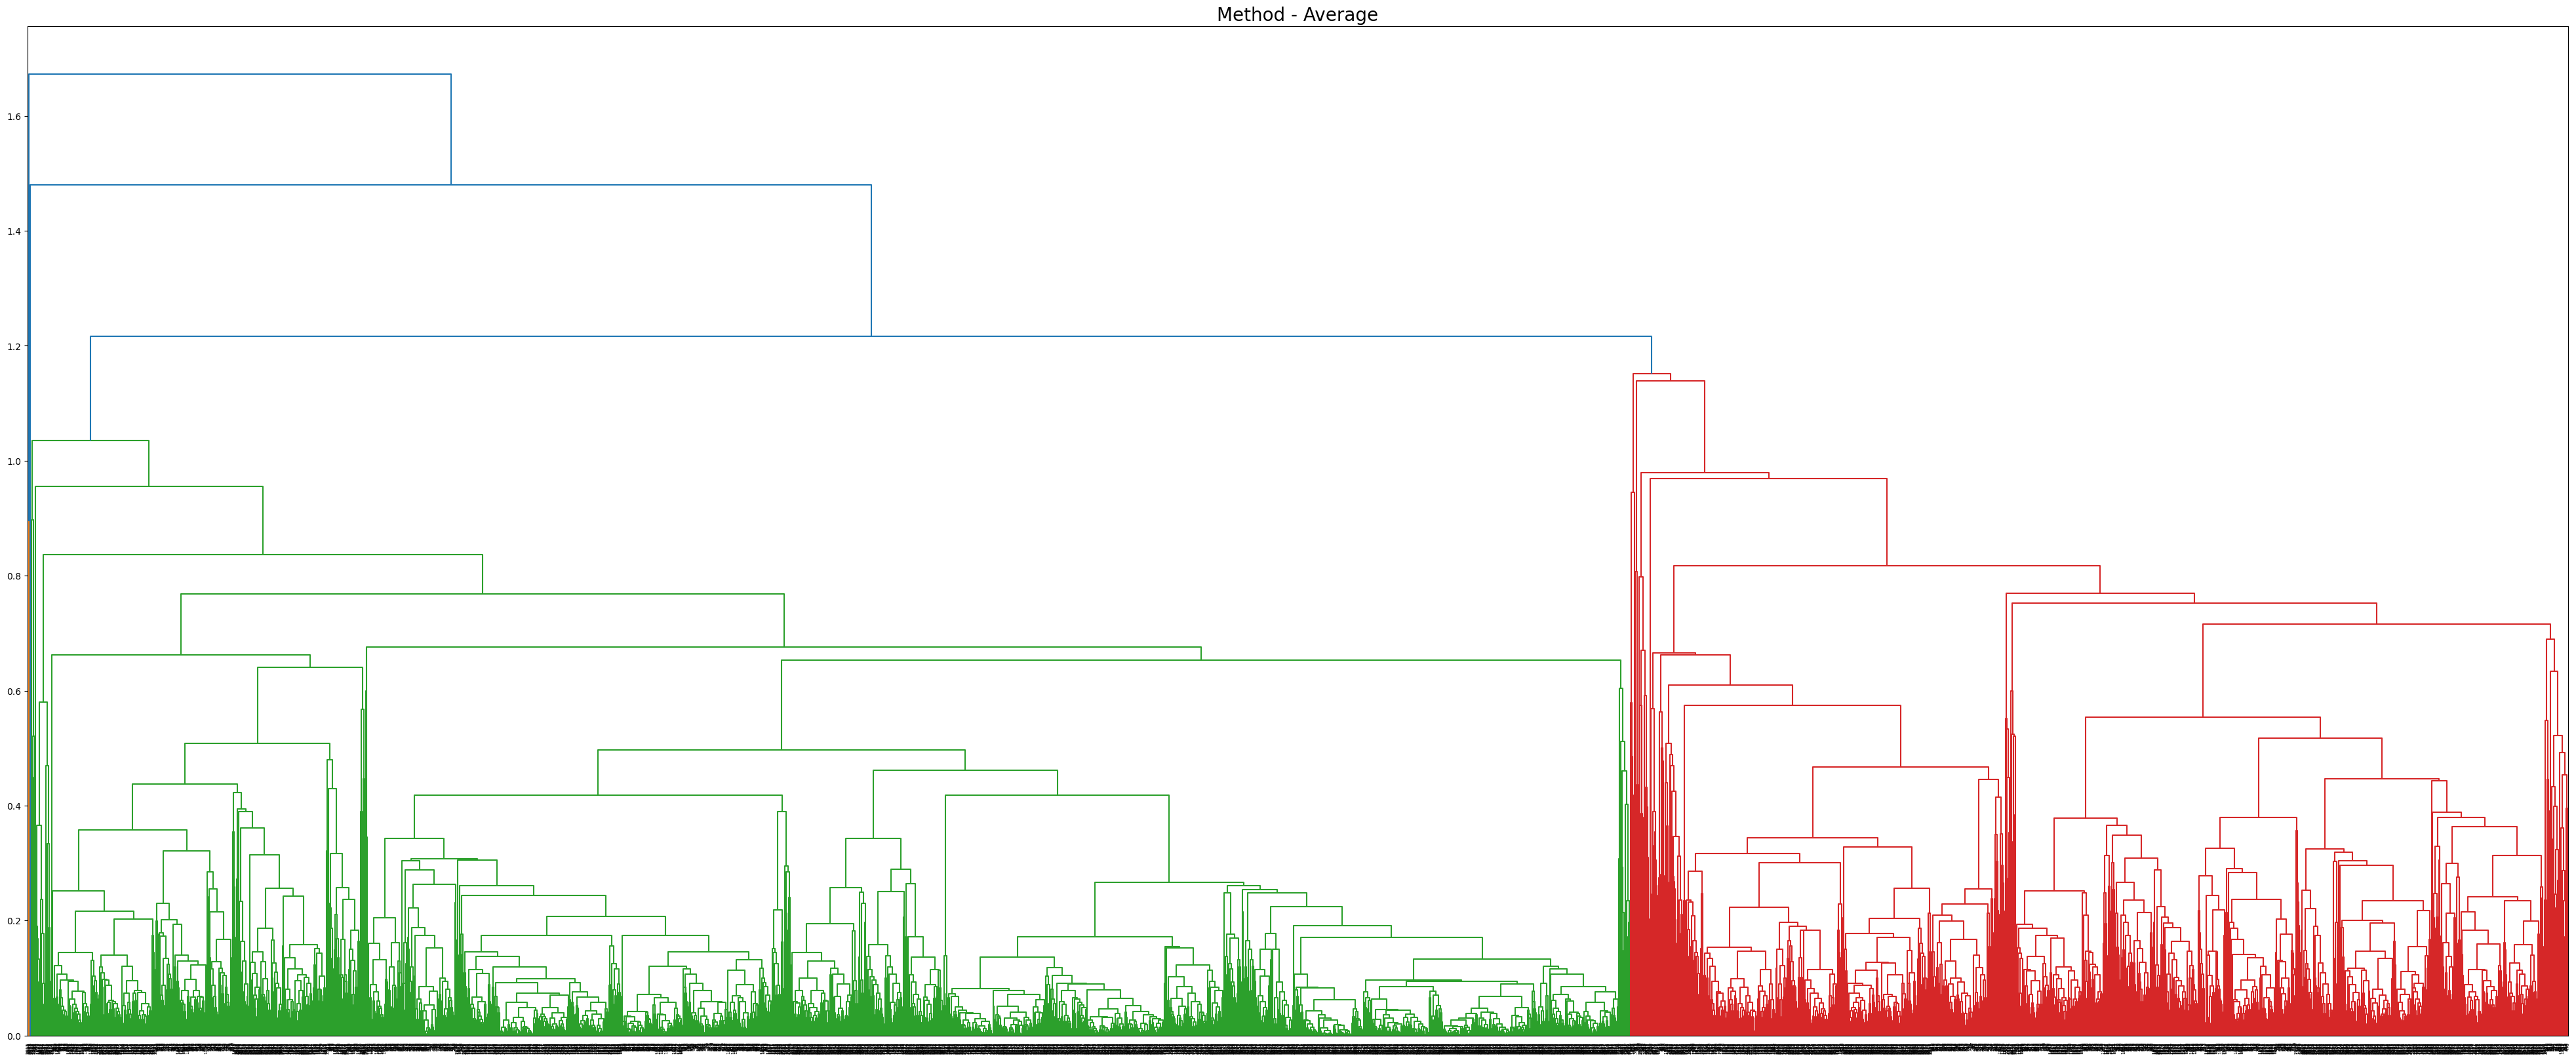

In [44]:
plt.figure(figsize=(50,20))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='average'))
plt.title("Method - Average", fontsize=20)
plt.show()

In [45]:
hc_a = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage= 'average')

In [46]:
y_hc_a = hc_a.fit_predict(minmax_df)
y_hc_a

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [47]:
df2=df.copy() 
df2['h_clusterid'] = y_hc_a
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [48]:
df2.h_clusterid.value_counts()

h_clusterid
1    2510
0    1462
4       8
2       7
6       6
3       4
5       1
Name: count, dtype: int64

In [49]:
df2.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,9.470821e+04,241.560192,2.647059,1.015732,1.000684,27548.586183,15.493844,797.608071,2.446648,4620.122435,1.0
1,1,5.941703e+04,87.881673,1.701992,1.013944,1.000797,10066.370120,9.100797,225.898008,0.651394,3820.964143,0.0
2,2,2.083429e+05,0.000000,3.000000,1.000000,3.857143,69533.142857,25.571429,400.000000,1.142857,4026.428571,0.0
3,3,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0
4,4,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0
5,5,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0
6,6,4.044688e+05,0.000000,5.000000,1.000000,1.000000,221842.500000,28.500000,2398.833333,6.166667,6331.833333,1.0


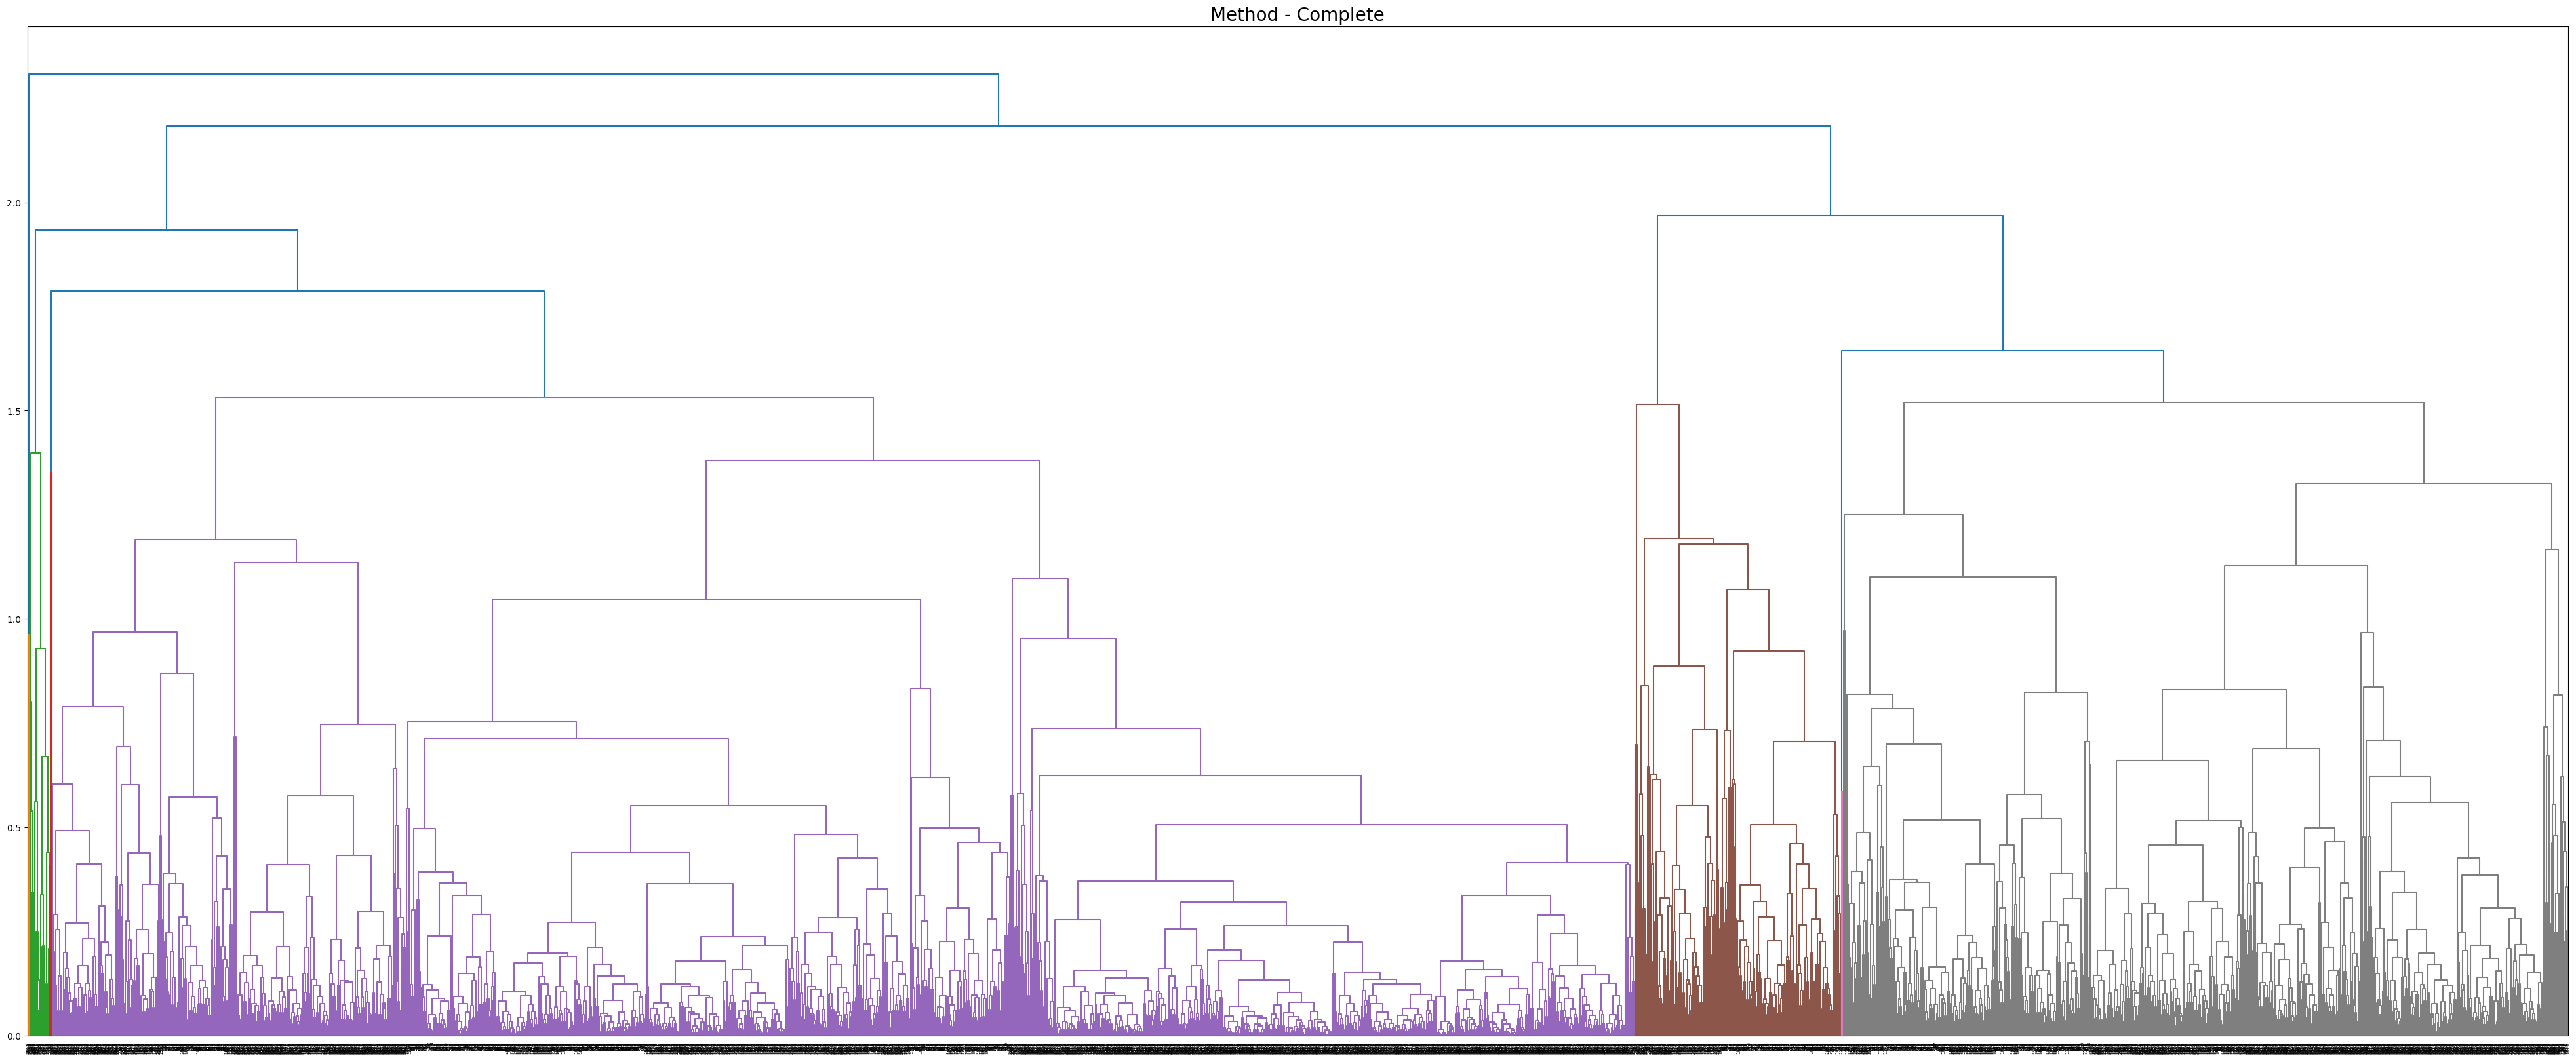

In [50]:
plt.figure(figsize=(50,20))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='complete'))
plt.title("Method - Complete", fontsize=20)
plt.show()

In [51]:
hc_c = AgglomerativeClustering(n_clusters=8, affinity = 'euclidean', linkage= 'complete')

In [52]:
y_hc_c = hc_c.fit_predict(minmax_df)
y_hc_c

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [53]:
df3=df.copy()
df3['h_clusterid'] = y_hc_c
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [54]:
df3.h_clusterid.value_counts()

h_clusterid
2    1934
0    1140
3     556
1     325
4      31
5       4
6       4
7       4
Name: count, dtype: int64

In [55]:
df3.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79918.920175,218.528947,2.098246,1.009649,1.000877,16823.058772,13.392982,740.800877,2.239474,4298.630702,1.000000
1,1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,2,45097.337125,90.706308,1.187177,1.000000,1.000517,3897.718201,6.801448,231.008790,0.675284,3845.414685,0.000000
3,3,111769.618705,81.217626,3.543165,1.001799,1.025180,32007.528777,17.089928,214.537770,0.579137,3756.753597,0.000000
4,4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548
5,5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000
6,6,152861.250000,8804.750000,4.000000,1.000000,1.000000,33927.500000,19.000000,500.000000,1.500000,5944.000000,1.000000
7,7,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


# K-Means Clustering

In [56]:
from sklearn.cluster import KMeans

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

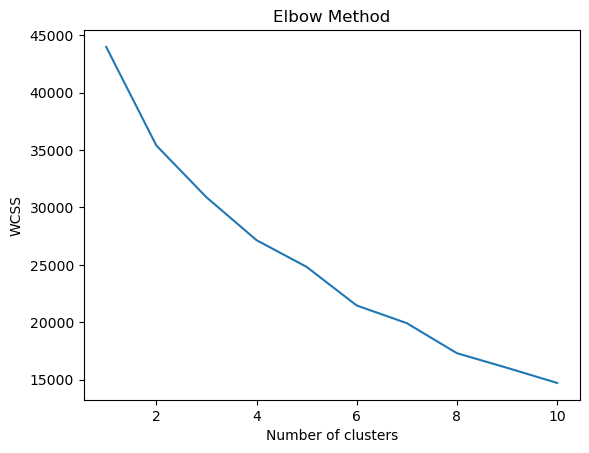

In [57]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(std_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
from pandas.core.common import random_state
clusters_new = KMeans(8, random_state=32)
clusters_new.fit(std_df)

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=32)

In [59]:
clusters_new.labels_

array([0, 0, 0, ..., 6, 3, 3])

In [60]:
df4=df.copy()
df4['h_clusterid'] = clusters_new.labels_

In [61]:
df4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,6
4018,64385,0,1,1,1,981,5,0,0,1395,1,6
4019,73597,0,3,1,1,25447,8,0,0,1402,1,6


In [62]:
df4.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,59307.459184,32.569388,1.496939,1.000000,1.001020,6235.202041,8.433673,174.996939,0.529592,5626.838776,0.000000
1,1,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,34614.029488,32.790980,1.252385,1.000000,1.000000,4424.204683,6.648742,150.398959,0.450997,2085.874241,0.000000
4,4,138370.597561,61.925610,4.201220,1.000000,1.002439,50224.776829,19.959756,388.939024,1.180488,4957.047561,0.630488
5,5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
6,6,58169.349383,98.964198,1.695062,1.000000,1.000000,10584.520988,10.607407,421.613580,1.295062,4254.603704,1.000000
7,7,199014.459016,520.221311,2.385246,1.000000,1.000000,36582.278689,29.844262,6137.696721,17.696721,4762.639344,0.819672


# DBSCAN

In [63]:
from sklearn.cluster import DBSCAN

In [64]:
EWAL=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
EWAL

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [65]:
dbscan = DBSCAN(eps = 1, min_samples=8)
dbscan.fit(std_df)

DBSCAN(eps=1, min_samples=8)

In [66]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
cl = pd.DataFrame(dbscan.labels_, columns=['clusters'])

In [68]:
cl

,clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3993,1
3994,1
3995,1
3996,0


In [69]:
dfd=pd.concat([df,cl], axis=1)
dfd.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusters
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,2.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,2.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,2.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,2.0,-1.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,0.0,0.0


In [70]:
dfd['clusters'].value_counts()

clusters
 0.0    2295
 1.0    1055
-1.0     637
 2.0      11
Name: count, dtype: int64

In [71]:
dfd.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1.0,81907.301109,107.957211,2.171157,1.007924,1.003170,18306.342314,12.036450,477.337559,1.481775,4694.098257,0.396197,1.207607
1,0.0,67873.577496,158.089755,1.992995,1.017075,1.014011,16402.766637,11.380911,469.306918,1.364273,3819.302539,0.354203,1.292907
2,1.0,82439.670802,135.699427,2.150763,1.013359,1.014313,18302.604008,11.915076,437.093511,1.354008,4502.467557,0.392176,1.222328
3,2.0,58414.636364,445.727273,2.090909,1.000000,1.000000,14583.090909,11.818182,578.636364,1.454545,2795.636364,0.363636,1.272727


# End Assignment